# Logistic Regression : A Generalization of Linear Regression

## Introduction
Linear regression is a commonly used tool in statistics. The linear regression model assumes a linear relationship between the input variables and the output variable. That means we assume the output to be a weighted sum of the inputs. Mathematically this is written as,

$$y=w^{T} . x = L(x,w)$$

where $y$ is the output predicted by the linear regression model, $x$ is the vector consisting of the input variable values, $W$ is the weight associated with each input and $w$ are the numerical values for those weights. $L(x,w)$ represents our linear model.

This model gives you a real numbered output between $-\infty$ to $\infty$. This is good when we require a continuous valued output. But sometimes what we need is an output that tells us to which class a particular input vector belongs. Or even better, the probability with which it belongs to a particular class.

Since linear regression is such a common model, naturally there has been attempts to tweak this model so as to achive this requirement, and logistic regression is the most popular outcome of this effort. 

## The Range Mismatch 
So now we need to generalize linear regression to output a probability instead of some real number. Ideally, if we want to model something as a linear regression all we need to do is equate it to $L(x,w)$. So in this case since we want to model the probability of an input $x$ being in say, class 1, we should ideally do something like,

$$P(x,w) = L(x, W=w) = w^{T}\cdot x$$

where $P(x,w) = Prob(class=1 | x; w)$ is the probability that the input $x$ belongs to class 1. But this won't hold up mathematically unless you place constraints on $w$ and $x$ (and it is not a good idea to palce constraints on the inputs). This is because the weighted sum can take up any value between $-\infty$ to $\infty$ but probability should always be a value between $0$ and $1$ (inclusive). So, the range of the function $P(x,w)$ and $L(x,w)$ does not match. How do we solve this problem?

## Constructing a function of P(x,w) with Matching Range
Since ranges of the two functions do not match we need to change one of them. And since we have already decided to stick to the linear model, we only have one choice, i.e, to change $P(x,w)$. But isn't our aim to predict the probability of an input being in a particular class? So how can we take $P(x,w)$ out of the equation? We can't. But what we can do is find a function of $P(x,w)$ which has a range of $( -\infty, \infty )$. Ofcourse, there are probably an infinite number of ways to map the interval $[0,1]$ to $( -\infty, \infty )$. We will choose one which is well interpretable (and which leads to the logistic regression model, since thats what this post is all about!). Let us do this in two steps.

1. We define a function called "odds" function represented as 
    $$\mathbb{O}(P(x,w))=\frac{P(x,w)}{1-P(x,w)}$$

    A few quick calculations will show that,

    $\mathbb{O}(0) = 0$

    $\mathbb{O}(0.5) = 1$

    $\mathbb{O}(1) = \infty$

    We can see that this function has a range of $[0, \infty)$. Also note that this function seems to be unevenly distributed for it's inputs. For inputs from the interval $[0, 0.5]$ it gives outputs from the interval $[0, 1]$ but for inputs from the interval $(0.5, 1]$ it gives outputs from the interval $(1, \infty)$. This is despite the fact that both these input intevals are of the same size. This function again, cannot be fitted with $L(x,w)$ because of the range mismatch.
    
2. Now let us perform anothe transformation on $\mathbb{O}$ such that it's range expands to $(-\infty, \infty)$. This will be the function to which we fit $L(x,w)$. Again, there are many possible mappings of a function from $[0, \infty)$ to $(-\infty, \infty)$ but it turns out taking the natural log of $\mathbb{O}$ gives us the desired range, while also being easy to work with (rather surprisingly!). This function is called the "log odds" function. So lets define,

    $$\mathbb{R}(\mathbb{O}(P(x,w))) = ln(\mathbb{O}(P(x,w))) = ln \left( \frac{P(x,w)}{1-P(x,w)} \right) = \mathbb{R}(P(x,w))$$

    By definition, 
    $$b = ln(c) \implies e^{b} = c$$ 
    So obviously,

    $\mathbb{R}(P(x,w)=1) = ln(\infty) =\infty$

    $\mathbb{R}(P(x,w)=0) = ln(0) =-\infty$

    $\mathbb{R}(P(x,w)=0.5) = ln(1) =0$

    This function is interesting. For example, if the probability of the input $x$ being in class 1 is $P(x,w)=0.7$, then the log odds is $\mathbb{R}(0.7)=0.8473$. On the contrary, the log odds of the input $x$ not being in class 1 ($Q(x,w)=1-P(x,w)=0.3$) is $\mathbb{R}(0.3)=-0.8473$. So the sum total of log odds of these only two possible options is $\mathbb{R}(P(x,w))+\mathbb{R}(Q(x,w))=0$. This is similar to $P(x,w)+Q(x,w)=1$. So we have managed to construct a function that has a range matching $L(x,w)$ and has properties similar to $P(x,w)$.

    Now finally we can write,
    $$\mathbb{R}(P(x,w)) = ln \left( \frac{P(x,w)}{1-P(x,w)} \right) =w^{T}\cdot x=L(x, W=w)$$

## Finding the Probability
What we are interested in is the probability $P(x,w)=Prob(class=1 | x; w)$. We can retreive that as follows,

$$ln \left( \frac{P(x,w)}{1-P(x,w)} \right) =w^{T}\cdot x$$ 
$$\frac{P(x,w)}{1-P(x,w)} = e^{w^{T}\cdot x}$$ 
$$P(x,w)(1 + e^{w^{T}\cdot x}) = e^{w^{T}\cdot x}$$ 
$$P(x,w) = \frac{e^{w^{T}\cdot x}}{1 + e^{w^{T}\cdot x}} = S(x, w)$$

We have arrived at the logistic model $S(x,w)$ which you may have seen before in connection with logistic regression. This function is in fact called the "sigmoid" function. This name is due to the fact that the graph of this function is S-shaped.

## The Derivative
One amazing thing about the sigmoid function is that it's derivative looks very neat. Lets derive it.

$$\frac{\delta S(x,w)}{\delta w} = \frac{\delta}{\delta w}\left( \frac{e^{w^{T}\cdot x}}{1 + e^{w^{T}\cdot x}} \right)$$ 

$$=\left( \frac{e^{w^{T}\cdot x}}{(1 + e^{w^{T}\cdot x})^{2}} \right) \cdot x$$ 

$$= \left( \frac{e^{w^{T}\cdot x}}{1 + e^{w^{T}\cdot x}} \times  \frac{1}{1 + e^{w^{T}\cdot x}} \right) \cdot x$$ 

$$\frac{\delta S(x,w)}{\delta w} = S(x,w) \times (1 - S(x,w)) \cdot x$$ 

This can be used when we want to compute $w$ using iterative algorithms like gradient descent.

## Computation
### Cost Function
The cost function that is usually minimized to find $w$ when using the logistic model is cross-entropy. This function takes the form,

$$C(S(x,w),y) = - (y \times ln(S(x,w)) + (1 - y) \times ln(1 - S(x,w)))$$

where $y$ is the actual output (assumed to be 1 if the input is in class 1, 0 otherwise) and $S(x,w)$ is the probability of input being in class 1 as calculated by the logistic model. 

Let's see what this cross-entropy function is telling us. Imagine the actual output is $y=1$. In that case, the function becomes,

$$C(S(x,w),y) = - 1 \times ln(S(x,w))$$

Now if $S(x,w)$ is close to 1 $ln(S(x,w))$ will tend to 0, and $C(S(x,w),y)$ will also tend to 0. But if $S(x,w)$ is closer to 0 (i.e the logistic model's output contradicts the actual output), then $ln(S(x,w))$ will tend to $-\infty$ which will make $C(S(x,w),y)$ tend to $\infty$. Now you know why that negative sign is important in the cross-entropy function's equation.

Similarly, when $y=0$, the function simpilifies to,

$$C(S(x,w),y) = -1 \times ln(1 - S(x,w))$$

Now when $S(x,w)$ is close to 1, $ln(1-S(x,w))$ tends to $-\infty$ and when $S(x,w)$ is closer to 0, $ln(1- S(x,w))$ tends to 0.

We can see that the cross-entropy function just takes on a bigger value when the actual output and the predicted output are mismatched. So it is a good fit for the role of a cost function.

### Gradient Descent
The gradient descent algorithm can be summarized as,

$$w_{new} = w_{old} - \alpha \times \frac{1}{N} \sum_{i=1}^{N} \left[ \frac{\delta C(S(x_{i},w),y_{i})}{\delta w} \right]_{w=w_{old}}$$

where $\alpha$ is a tunable parameter called "learning rate". 

The gradient descent algorithms will :
1. Start with some random value for $w$.

2. Compute S(x,w) with this $w$.

3. Compute the cost function $C(S(x,w), y)$ for different samples (i.e x,y pairs).

4. Compute the derivative $\left[ \frac{\delta C(S(x,w),y)}{\delta w} \right]_{w=w_{old}}$ for each sample.

5. Average out the value for the derivative across all samples.

6. Apply the above formula to find the new $w$.

7. Repeat until some stoppage criteria is met.

The important step here is to compute the derivative of the cost function w.r.t $w$. Let's derive this.

Using chain rule for derivatives,

$$\frac{\delta C(S(x),y)}{\delta w} = \frac{\delta C(S(x,w), y)}{\delta S(x,w)} \times \frac{\delta S(x,w)}{w}$$

Using multiplication rule for derivatives for the first derivative and using the derivative for $S(x,w)$ we derived in the previous section for the second derivative we get,

$$\frac{\delta C(S(x),y)}{\delta w}  = - \left( \frac{y}{S(x,w)} - \frac{1-y}{1-S(x,w)} \right) \times S(x,w) \times (1 - S(x,w)) \cdot x = \frac{(S(x,w) - y) \times S(x,w) \times (1 - S(x,w))}{S(x,w) \times (1 - S(x,w))} \cdot x$$

Cancelling out the common terms in the numerator and denominator we finally get,

$$\frac{\delta C(S(x),y)}{\delta w}  = (S(x,w) - y) \cdot x$$

### Including a Bias
Normally, the linear model that is being fit will also include a weight variable which is added without being multiplied to any input. This makes the linear model look like,

$$L(x,w,b)=w^{T} \cdot x + b$$

I am talking about the extra $b$ variable. We can easily add a bias term to the linear model without any change of notation if we do the following,
1. Append a 1 to the input vector. i.e, let $x = [1, x]^{T}$
2. Append the variable $b$ to the weight vector. i.e, let $w = [b, w]^{T}$

By modifying the variables in this manner, you can account for the bias term without any change in the notation discussed above. 

## Coding a Logistic Regression Model from Scratch

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
def sigmoid(x, w):
    z = np.exp(-np.matmul(x, w))
    return np.ones_like(z) / (np.ones_like(z) + z)

In [113]:
def cross_entropy(s, y):
    epsilon = 1e-7
    zero_part = y * np.log(s + epsilon)
    one_part = (np.ones_like(y) - y) * np.log(np.ones_like(s) - s + epsilon)
    val = - (1 / y.shape[0]) * np.sum(zero_part + one_part)
    return val

In [85]:
def gradient(s, y, x):
    return (s - y) * x

In [116]:
def train(features, labels, alpha, num_iter=10000):
    num_inputs = features.shape[0]
    input_size = features.shape[1]
    
    w = np.random.rand(input_size, 1)
    for i in range(num_iter) :
        s = sigmoid(features, w)
        c = cross_entropy(s, labels)
        g = np.sum(gradient(s, labels, features).T, axis=1, keepdims=True) / num_inputs
        w = w - alpha * g
        
        if (i+1) % 1000 == 0 :  
            print("Iteration  : ", i + 1, " cost : ", c)
        
    return w

Lets create some dummy data and labels to try out this model. Notice that we are appending an array of ones to the features in order to account for the bias weights.

In [87]:
features = np.array([10, 15, 5, 7]).reshape((4, 1))
features = np.hstack((features, np.ones((4,1))))
labels = np.array([1, 1, 0, 0]).reshape((4, 1))

Now we will calculate the weights required to correctly predict the class labels, using gradient descent. The bias term will also be included in the weight vector returned by the function.

In [117]:
w = train(features, labels, 0.5, 3000)

Iteration  :  1000  cost :  0.033237116194023704
Iteration  :  2000  cost :  0.022155567944981008
Iteration  :  3000  cost :  0.016604891197097918


Let us plot the features, labels and the learned sigmoid function.

(100, 2)
(100, 1)


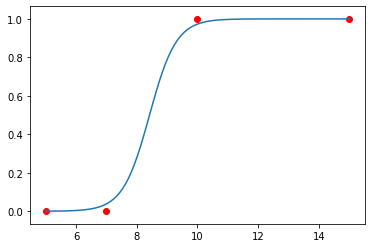

In [118]:
plt.figure()
plt.scatter(features[:,0], labels, color='r')
sig_x = np.linspace(np.min(features[:,0]), np.max(features[:,0]), num=100).reshape((100,1))
sig_x = np.hstack((sig_x, np.ones((100,1))))
print(sig_x.shape)
sig_y = sigmoid(sig_x, w)
print(sig_y.shape)
plt.plot(sig_x[:,0], sig_y)

plt.show()

As you can see, the weights have been adjusted in such a way that the sigmoid function takes a value near 1 for samples labelled 1, and 0 for sampels labelled 0.

### The Weights Learned

In [119]:
np.set_printoptions(formatter={"float_kind": lambda x: "%.3f" % x}) # just something to make numpy arrays print pretty
print(w)

[[2.273]
 [-19.146]]


### The Numerical Output from the Logistic Model

In [120]:
print(sigmoid(features, w))

[[0.973]
 [1.000]
 [0.000]
 [0.038]]
